In [116]:
# All required libraries are imported here for you.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [97]:
# Load the dataset
crops = pd.read_csv("C:/Users/marco/OneDrive/Documentos/GitHub/DataCamp/Files/soil_measures.csv")

In [98]:
# Show the data
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [99]:
# Checking crops info
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [100]:
# Check missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [101]:
# Checking crop types
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [102]:
# Using all features for training to predict values of the target.

X_train, X_test, y_train, y_test =  train_test_split(
    crops[["N", "P", "K", "ph"]],
    crops["crop"],
    test_size = 0.2,
    random_state = 42
)

In [103]:
# Predict the crop using each feature individually.
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",)


    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.1020973317588429


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.12178738365616022
F1-score for K: 0.20906447400900086
F1-score for ph: 0.04532731061152114


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
# Estimating feature correlation
crops_corr = crops[["N", "P", "K", "ph"]].corr()

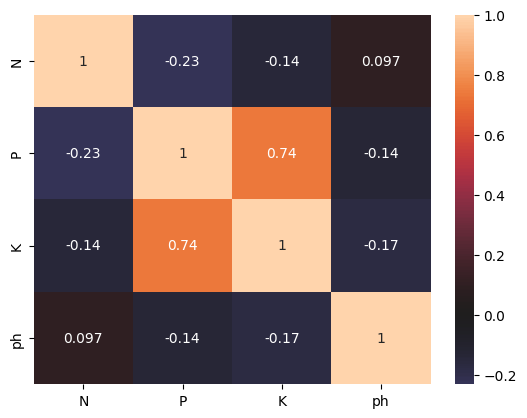

In [105]:
# Show the correlation between each pair of the features
sns.heatmap(crops_corr, annot=True, center=0)
plt.show()

In [106]:
# Producing the final model
final_features = ["N","K","ph"]

In [107]:
# Re split the df
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size = 0.2,
    random_state = 42
)

In [108]:
# Predict all crop using each feature individually.
log_reg = LogisticRegression(
    max_iter=2000,
    multi_class="multinomial"
)

In [110]:
# Fit model
log_reg.fit(X_train, y_train)

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [111]:
# Predicted values for the target variable
y_pred = log_reg.predict(X_test)

In [120]:
# Analyse the model performance
model_performance = f1_score(y_test, y_pred, average="weighted")
round(model_performance, 2)

0.57